In [13]:
import pandas as pd
import sympy as sp
import numpy as np
import os as os
import matplotlib.pyplot as plt 

pd.set_option("display.precision", 10)

In [14]:
def remove_file(file_name):
    if os.path.exists(file_name):
        os.remove(file_name)
        

In [15]:
def export_table(data_frame, file_name):
    remove_file(f"{file_name}.csv")
    remove_file(f"{file_name}.html")
    data_frame.to_csv(f"{file_name}.csv")
    data_frame.to_html(f"{file_name}.html")
                

In [16]:
def create_dictionary(columns):
    dictionary = {}
    for c in columns: 
        dictionary[c] = []    
    return dictionary

In [17]:
cols = ["i", "x2", "x1", "x3", "Error"]
dict1 = create_dictionary(cols)

In [18]:
def add_info(dictionary, columns, data):
    i = 0
    for c in columns:
        dictionary[c].append(data[i])
        i += 1

In [19]:
def secante(f, x1, x2, tol):
    print ("Este programa encuentra una raíz por el método de la secante ")
    x3 = 0
    n = 0
    error = 100
    data = [n, x2, x1, x3, error]
    print('{:^10}{:^10}{:^10}{:^10}{:^10}'.format('i', 'xi', 'f(xi)', 'x3', 'error'))
    
    while error > tol:
        x3 = x2 - ((x1 - x2) / (f(x1) - f(x2))) * f(x2)
        x1 = x2
        x2 = x3
        error = abs((x2 - x1) / x2)
        n += 1
        print('{:^10}{:^10.6f}{:^10.6f}{:^10.6f}{:^10.6f}'.format(n, float(x1), float(f(x1)), float(x2), float(error)))
        data = [n, x2, x1, x3, error]
        add_info(dict1, cols, data)
        
    print("Solución aproximada :", x3)
    print("Número de iteraciones:", n)
    

In [20]:
f = lambda x: x**2 - 10

Este programa encuentra una raíz por el método de la secante 
    i         xi      f(xi)       x3      error   
    1     11.000000 111.000000 5.714286  0.925000 
    2      5.714286 22.653061  4.358974  0.310924 
    3      4.358974  9.000657  3.465455  0.257836 
    4      3.465455  2.009375  3.208647  0.080036 
    5      3.208647  0.295413  3.164384  0.013988 
    6      3.164384  0.013326  3.162293  0.000661 
    7      3.162293  0.000097  3.162278  0.000005 
    8      3.162278  0.000000  3.162278  0.000000 
Solución aproximada : 3.1622776601683915
Número de iteraciones: 8


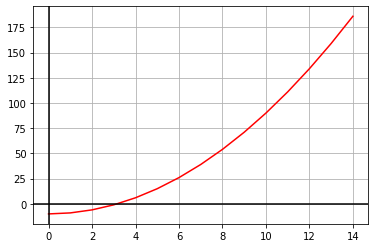

In [21]:
secante(f, 10, 11, 1e-7)

x = np.arange(0, 15)
y = f(x)

plt.plot(x, y, 'r');
plt.grid()
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()